In this notebook, we're going to visualize shark's incidences over the course of years and by country. We're going to plot a heatmap where the rows are countries and the columns, years. We think this kind of chart will provide a visual trend of the countries involve in the attacks as well as the number of attacks.

First, let's import some libraries: `pandas` will allow us to load the dataset and do some clean while `altair` is the library we will use for visualization.

In [1]:
import pandas as pd
import altair

The data is available [here](https://www.kaggle.com/teajay/global-shark-attacks/downloads/global-shark-attacks.zip). You can do this:
```shell
wget https://www.kaggle.com/teajay/global-shark-attacks/downloads/global-shark-attacks.zip
```
and then, decompress it to your `data` directory:
```shell
unzip global-shark-attacks.zip -d data
```


We are going to import just a few columns since it's just what will be needed.

In [2]:
df = pd.read_csv("data/attacks.csv", encoding="latin1", usecols=["Year", "Country"])
df.head()

,Year,Country
0,2016,USA
1,2016,USA
2,2016,USA
3,2016,AUSTRALIA
4,2016,AUSTRALIA


Let's see what inside these columns

In [3]:
df.Year.unique()

array([2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006,
       2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995,
       1984, 1994, 1993, 1992, 1991, 1990, 1989, 1969, 1988, 1987, 1986,
       1985, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974,
       1973, 1972, 1971, 1970, 1968, 1967, 1966, 1965, 1964, 1963, 1962,
       1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951,
       1950, 1949, 1948, 1848, 1947, 1946, 1945, 1944, 1943, 1942, 1941,
       1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932, 1931, 1930,
       1929, 1928, 1927, 1926, 1925, 1924, 1923, 1922, 1921, 1920, 1919,
       1918, 1917, 1916, 1915, 1914, 1913, 1912, 1911, 1910, 1909, 1908,
       1907, 1906, 1905, 1904, 1903, 1902, 1901, 1900, 1899, 1898, 1897,
       1896, 1895, 1894, 1893, 1892, 1891, 1890, 1889, 1888, 1887, 1886,
       1885, 1884, 1883, 1882, 1881, 1880, 1879, 1878, 1877, 1876, 1875,
       1874, 1873, 1872, 1871, 1870, 1869, 1868, 18

It appears that we have some misinformed values for `Year`. `500` or `5` isn't what we really expect as a value of a year unless we're dealing with medievial time, which, we think in this dataset is not the case.

In [4]:
df.Country.unique()

array(['USA', 'AUSTRALIA', 'NEW CALEDONIA', 'REUNION', 'BAHAMAS', 'SPAIN',
       'CHINA', 'JAPAN', 'COLUMBIA', 'SOUTH AFRICA', 'EGYPT',
       'NEW ZEALAND', 'INDONESIA', 'FRENCH POLYNESIA', 'CAPE VERDE',
       'Fiji', 'BRAZIL', 'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS',
       'UNITED ARAB EMIRATES', 'ARUBA', 'MOZAMBIQUE', 'THAILAND', 'FIJI',
       'PUERTO RICO', 'ITALY', 'MEXICO', 'ATLANTIC OCEAN', 'GREECE',
       'MAURITIUS', nan, 'ST. MARTIN', 'FRANCE', 'ECUADOR',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'PHILIPPINES', 'NIGERIA', 'TONGA',
       'SCOTLAND', 'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA',
       'KENYA', 'RUSSIA', 'TURKS & CAICOS', 'COSTA RICA', 'UNITED KINGDOM',
       'MALAYSIA', 'UNITED ARAB EMIRATES (UAE)', 'SAMOA', 'AZORES',
       'SOLOMON ISLANDS', 'SOUTH KOREA', 'MALTA', 'VIETNAM', 'MADAGASCAR',
       'PANAMA',

The `Country` columns seems to have strange values too. Althought we could try to work with these strange numbers, it we will not be the case in this visualization. We're just going to ignore them.

In [5]:
df = df[df.Year >= 1543]
df.count()

Year       5865
Country    5827
dtype: int64

It seems that there are dozens of missing values in the `Country` coulmn. We discard theme too.

In [6]:
df = df[~df.Country.isnull()]
df.count()

Year       5827
Country    5827
dtype: int64

In [7]:
df.Country.unique()

array(['USA', 'AUSTRALIA', 'NEW CALEDONIA', 'REUNION', 'BAHAMAS', 'SPAIN',
       'CHINA', 'JAPAN', 'COLUMBIA', 'SOUTH AFRICA', 'EGYPT',
       'NEW ZEALAND', 'INDONESIA', 'FRENCH POLYNESIA', 'CAPE VERDE',
       'Fiji', 'BRAZIL', 'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS',
       'UNITED ARAB EMIRATES', 'ARUBA', 'MOZAMBIQUE', 'THAILAND', 'FIJI',
       'PUERTO RICO', 'ITALY', 'MEXICO', 'ATLANTIC OCEAN', 'GREECE',
       'MAURITIUS', 'ST. MARTIN', 'FRANCE', 'ECUADOR', 'PAPUA NEW GUINEA',
       'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL', 'DIEGO GARCIA', 'TAIWAN',
       'JAMAICA', 'PALESTINIAN TERRITORIES', 'GUAM', 'SEYCHELLES',
       'BELIZE', 'PHILIPPINES', 'NIGERIA', 'TONGA', 'SCOTLAND', 'CANADA',
       'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA', 'RUSSIA',
       'TURKS & CAICOS', 'COSTA RICA', 'UNITED KINGDOM', 'MALAYSIA',
       'UNITED ARAB EMIRATES (UAE)', 'SAMOA', 'AZORES', 'SOLOMON ISLANDS',
       'SOUTH KOREA', 'MALTA', 'VIETNAM', 'MADAGASCAR', 'PANAMA',
       'SOM

Now, we want the countries name to be in title. We create a little helper function for the job.

In [8]:
def capitalize(name):
    name = str.strip(name, "?")
    if " " in name:
        names = str.split(name, " ")
        names = map(lambda s: str.capitalize(s), names)
        name = " ".join(names)
        return name
    return name.capitalize()

We can then pass the function to the column's `apply`'method.

In [9]:
df.Country = df.Country.apply(capitalize)
df.head()

,Year,Country
0,2016,Usa
1,2016,Usa
2,2016,Usa
3,2016,Australia
4,2016,Australia


For the incidence cases, we group the data by year and country and count the number of occurences that automatically get into a new column.

In [10]:
df = df.groupby(by=["Year", "Country"]).size().reset_index()
df.head()

,Year,Country,0
0,1543,Venezuela,1
1,1554,France,1
2,1580,Between Portugal & India,1
3,1595,India,1
4,1617,India,1


We rename the new column for clarity.

In [11]:
df.rename_axis({0: "Incidence"}, axis=1, inplace=True)
df.head()

,Year,Country,Incidence
0,1543,Venezuela,1
1,1554,France,1
2,1580,Between Portugal & India,1
3,1595,India,1
4,1617,India,1


### Altair

[`Altair`](https://altair-viz.github.io/) is a declarative statistical visualization library for Python, based on [`Vega-Lite`](http://vega.github.io/vega-lite). You can install it using:
```python
pip install altair
```
or
```python
conda -c conda-forge install altair
```

Plotting with `Altair` is very straitghforward. You just give to `Chart` your datframe and subsequently calling different methods to specify what it's gonna be done with yoyr data.

In [14]:
values = list(range(1543, 2024, 11))

chart = altair.Chart(df).mark_text(
        applyColorToBackground=True
        ).encode(altair.Column("Year",
                    axis=altair.Axis(title=" ", values=values),
                ),
                altair.Row("Country",
                    axis=altair.Axis(title=" "),
                ),
                altair.Color("Incidence",
                    legend=altair.Legend(title=" "),
                ),
                altair.Text(" ",
                ),
        ).configure_scale(
            textBandWidth=20,
        )

And to visualize the result in the notebook, you just hit the chart objet you created and bam!

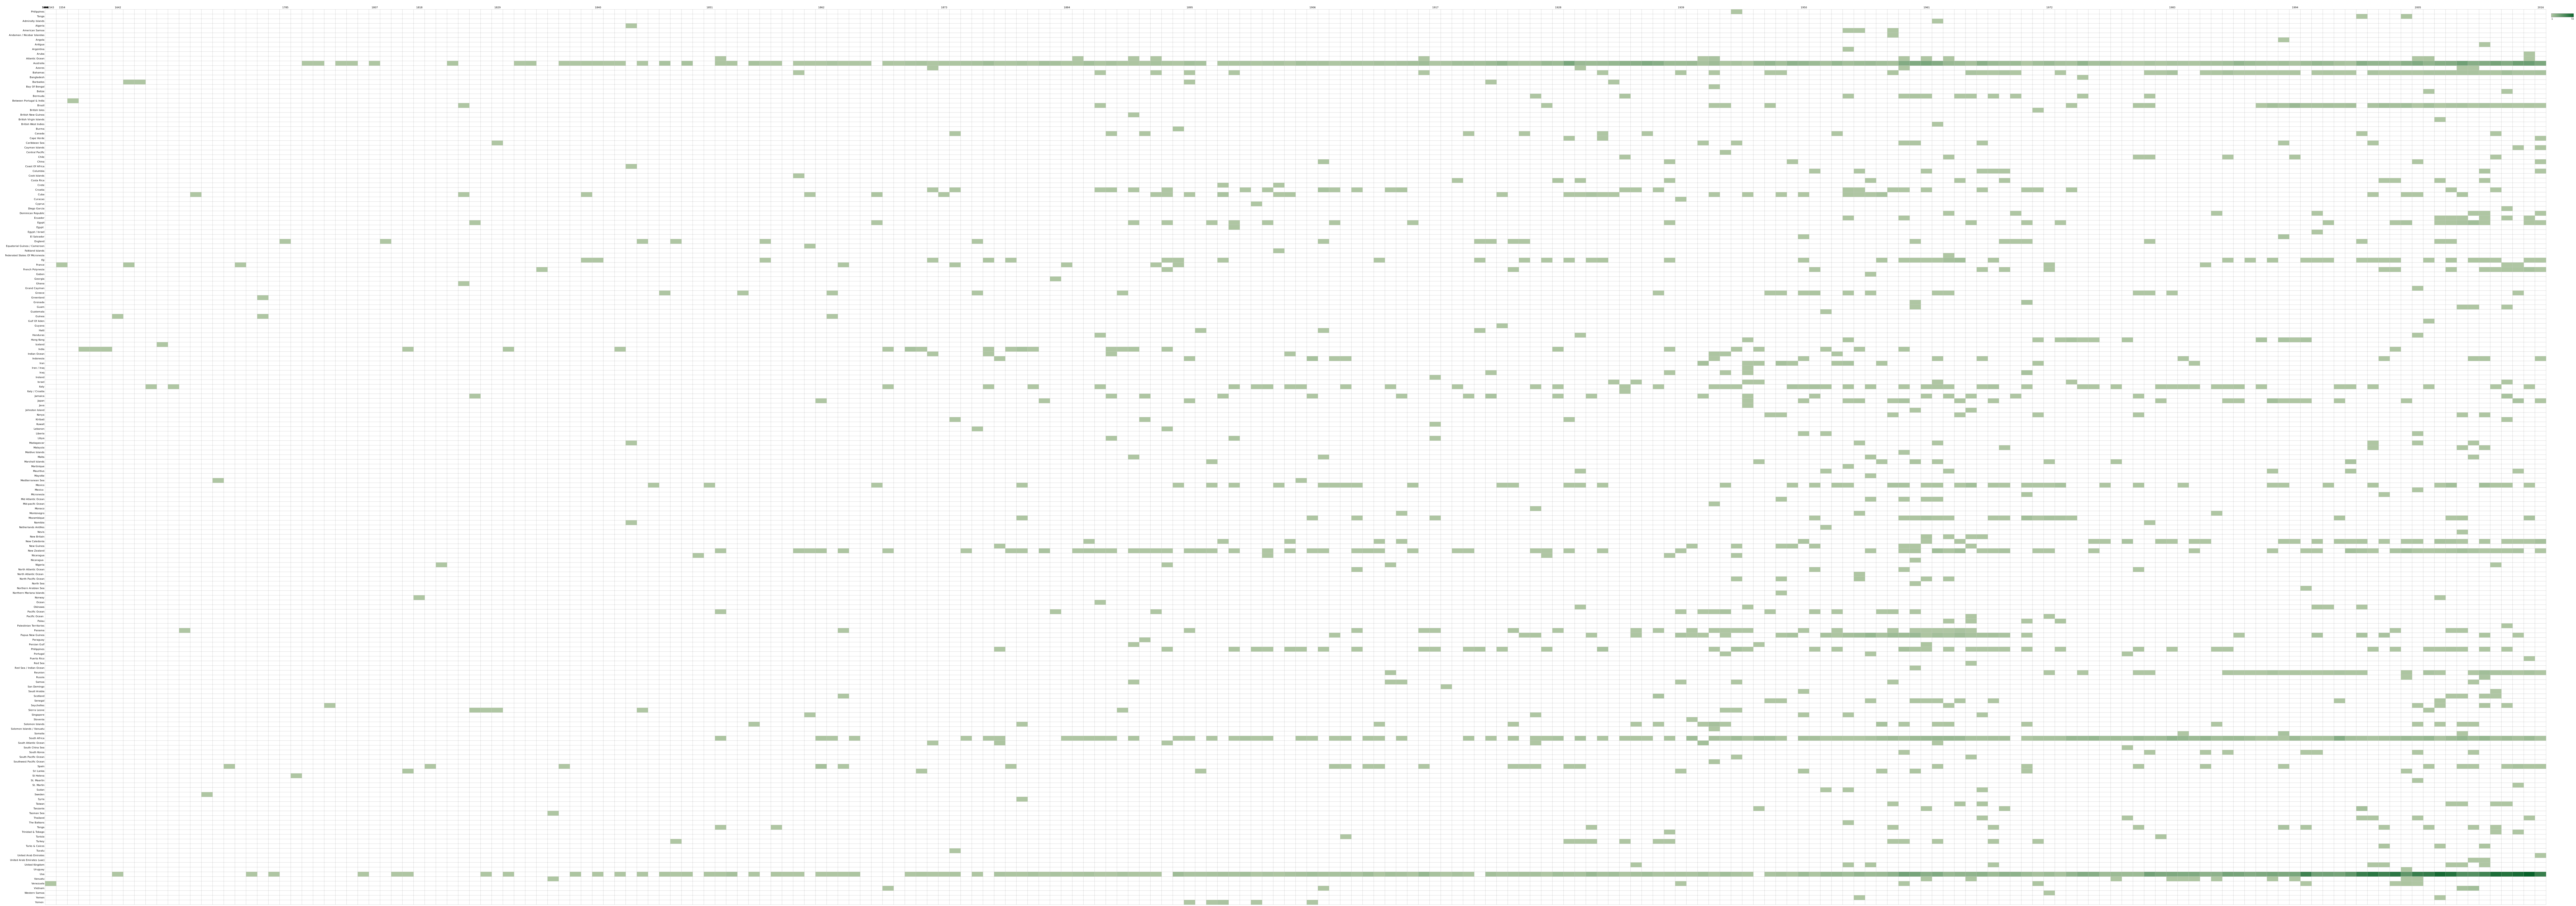

In [15]:
chart

With this visualization, we can see that shark's attaks are spreading and increasing over the year. It is due to the increase in human/shark or both population? Which, will increase the probability of human-shark interaction. Or it's because humans are becoming less cautious? Or it's the other way around.

### Future directions

We could, in this same chart, plot the sex involve in theses attacks or the type of attacks. To see if some kind of attacks are temporal or are specific to some countries.